In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
def train_hopfield(N,v):
    W = np.zeros((N,N))
    for i in range(0,N-1):
        for j in range(i+1,N):
            W[i,j] = v[i]*v[j]
    W = W+ np.transpose(W)
    return W

def run_hopfield(W,v0,steps,threshold=None):
    N = np.shape(W)[0]
    if threshold is None:
        threshold = np.zeros(N)
    sequence =np.zeros((steps,N),dtype=int)
    sequence[0,:] = v0
    for step in range(0,steps-1):
        neuron = np.random.randint(N)
        prod = sequence[step,:]@W
        sequence[step+1,:] = sequence[step,:]
        if prod[neuron]>=threshold[neuron]:
            sequence[step+1,neuron] = int(1)
        else:
            sequence[step+1,neuron] = int(-1)
    return sequence

In [3]:
N=12
random_memory = 2*np.random.randint(2, size=N)-1
print(random_memory)
W = train_hopfield(N,random_memory)
random_IC = random_memory
random_IC[0]=-random_memory[0]
random_IC[5]=-random_memory[5]
random_IC[2]=-random_memory[2]
print(random_IC)
states = run_hopfield(W,random_IC,100)

[ 1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1]


In [4]:
print(states)

[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [ 1 -1  1 ... -1 -1 -1]
 [ 1 -1  1 ... -1 -1 -1]
 [ 1 -1  1 ... -1 -1 -1]]


In [5]:
states[len(states)-1,:]

array([ 1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1])

# Visualising hopfield memories

Create a memory in a 5 X 5 grid

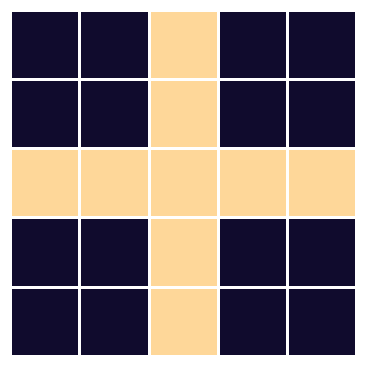

In [4]:
N = 5*5
memory = np.array([
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
])
fig, ax = plt.subplots(1,1)
fig.set_size_inches(4,4)
sns.heatmap(memory,cmap='magma',cbar=False,ax=ax,vmin=-0.1,vmax=1.1,linewidths=1, linecolor='white')
plt.tight_layout()
plt.axis('off')
plt.show()
fig.savefig('cross.pdf', format="pdf", bbox_inches="tight")


In [5]:
memory = 2*memory-1
W = train_hopfield(N,memory.flatten())

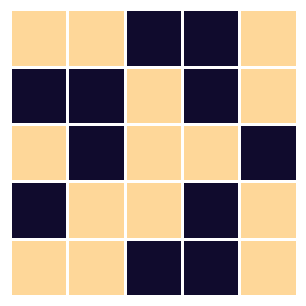

In [49]:
M = 5
N = M*M
IC = np.array([
    [1, 1, 0, 0, 1],
    [0, 0, 1, 0, 1],
    [1, 0, 1, 1, 0],
    [0, 1, 1, 0, 1],
    [1, 1, 0, 0, 1]
])
fig, ax = plt.subplots(1,1)
fig.set_size_inches(4,4)
sns.heatmap(IC,cmap='magma',cbar=False,ax=ax,vmin=-0.1,vmax=1.1,linewidths=1, linecolor='white')
plt.tight_layout()
plt.axis('off')
plt.show()
IC = 2*IC-1
states = run_hopfield(W,IC.flatten(),10000)

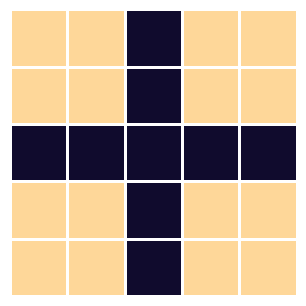

In [50]:
show_state = (states[9999].reshape(5,5)+1)/2
fig, ax = plt.subplots(1,1)
fig.set_size_inches(4,4)
sns.heatmap(show_state,cmap='magma',cbar=False,ax=ax,vmin=-0.1,vmax=1.1,linewidths=1, linecolor='white')
plt.tight_layout()
plt.axis('off')
plt.show()


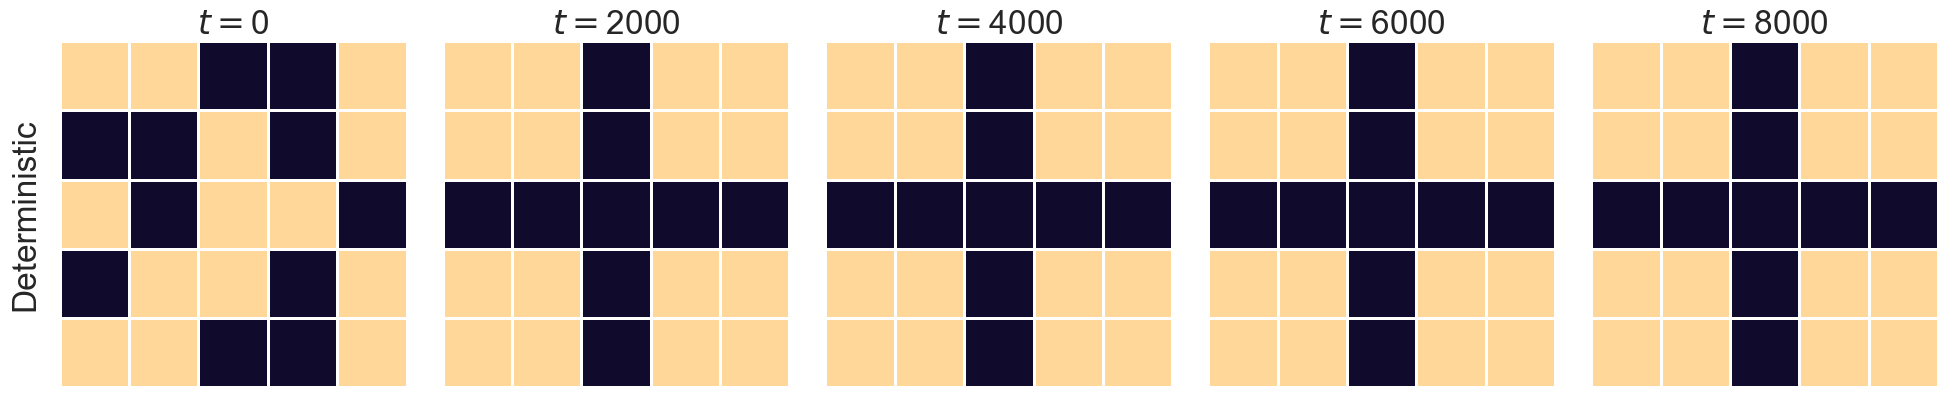

In [51]:
sns.set(font_scale=2)
fig, ax = plt.subplots(1,5)
fig.set_size_inches(20,4.5)
seq =[0,2000,4000,6000,8000]
for i in range(0,5):
    show_state = (states[seq[i]].reshape(5,5)+1)/2
    sns.heatmap(show_state,cmap='magma',cbar=False,ax=ax[i],vmin=-0.1,vmax=1.1,linewidths=1, linecolor='white')
    ax[i].axis('off')
    ax[i].set_title(r'$t=$'+str(seq[i]))
ax[0].axis('on')
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_ylabel('Deterministic')
plt.tight_layout()
plt.show()
fig.savefig('cross_diverge_2.pdf', format="pdf", bbox_inches="tight")

In [39]:
states[0]

array([ 1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1,
        1, -1,  1,  1,  1, -1, -1,  1])

In [59]:
def energy(states,W):
    N = W.shape[0]
    L = len(states)
    energy =[]
    for s in range(0,L):
        E=0 
        for i in range(0,N):
            for j in range(0,N):
                E += -0.5*(W[i,j]*states[s,i]*states[s,j])
        energy.append(E)
    return(energy)

In [60]:
E = energy(states,W)

/Users/ramon/opt/anaconda3/envs/networks/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramon/opt/anaconda3/envs/networks/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramon/opt/anaconda3/envs/networks/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ramon/opt/anaconda3/envs/networks/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

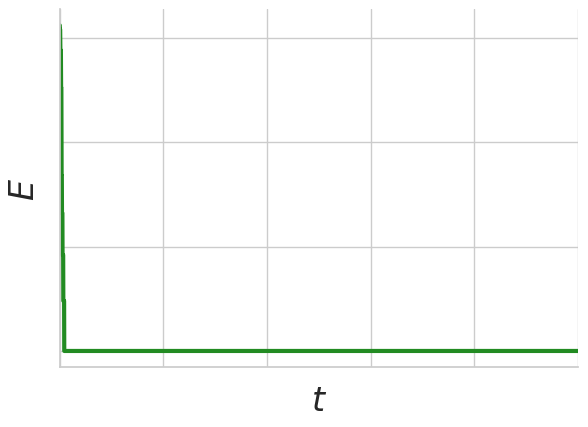

In [71]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1)
sns.lineplot(E,ax=ax,color='forestgreen',linewidth=3)
ax.set_xlim(0,10000)
ax.set_ylabel(r'$E$')
ax.set_xlabel(r'$t$')


ax.set_xticklabels([])
ax.set_yticklabels([])
sns.despine()
plt.tight_layout()
plt.show()

fig.savefig('detenergy.pdf', format="pdf", bbox_inches="tight")